### Machine Learning - Digital Assignment

#### 20BCE0083- Jeevan Yohan Varghese

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Exploring Data

In [53]:

# Load data from CSV file
sales_data = pd.read_csv("bigmart_train.csv")

# Explore data
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Preprocessing Data

In [54]:

# Check for null values
print(sales_data.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [55]:
# Fill missing values
sales_data["Item_Weight"].fillna(sales_data["Item_Weight"].mean(), inplace=True)
sales_data["Outlet_Size"].fillna("Unknown", inplace=True)

# Convert categorical variables to numerical
sales_data = pd.get_dummies(sales_data, columns=["Item_Fat_Content",
                                                  "Outlet_Size", "Outlet_Location_Type"])

In [56]:
# Split data into training and test sets
X = sales_data.drop(["Item_Identifier", "Item_Outlet_Sales", "Outlet_Identifier","Item_Type","Outlet_Type"], axis=1)
y = sales_data["Item_Outlet_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Regression Model and Evaluation

In [57]:

# Create and fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Mean squared error: 1460268.51
Coefficient of determination: 0.46


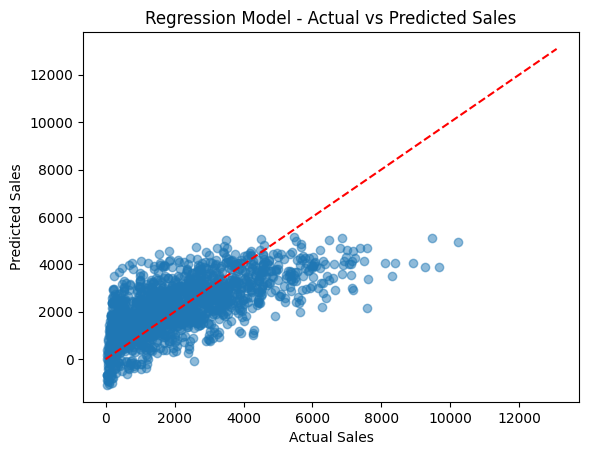

In [58]:
# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(np.linspace(0, max(y), 100), np.linspace(0, max(y), 100), 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Regression Model - Actual vs Predicted Sales')
plt.show()

### Top Products

Item_Type
Fruits and Vegetables    2.820060e+06
Snack Foods              2.732786e+06
Household                2.055494e+06
Frozen Foods             1.825735e+06
Dairy                    1.522594e+06
Canned                   1.444151e+06
Baking Goods             1.265525e+06
Health and Hygiene       1.045200e+06
Meat                     9.175656e+05
Soft Drinks              8.928977e+05
Name: Item_Outlet_Sales, dtype: float64


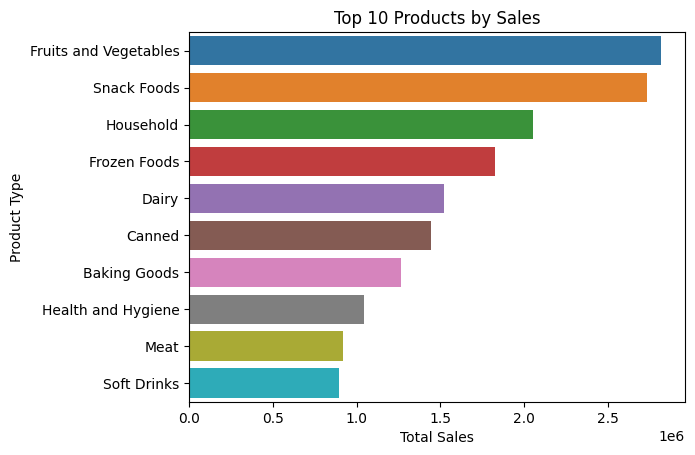

In [60]:
# Visualize top products and stores with highest impact on sales
top_products = sales_data.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)[:10]
print(top_products)

sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Type")
plt.show()


### Top Stores

Outlet_Type
Supermarket Type1    1.291734e+07
Supermarket Type3    3.453926e+06
Supermarket Type2    1.851823e+06
Grocery Store        3.680343e+05
Name: Item_Outlet_Sales, dtype: float64


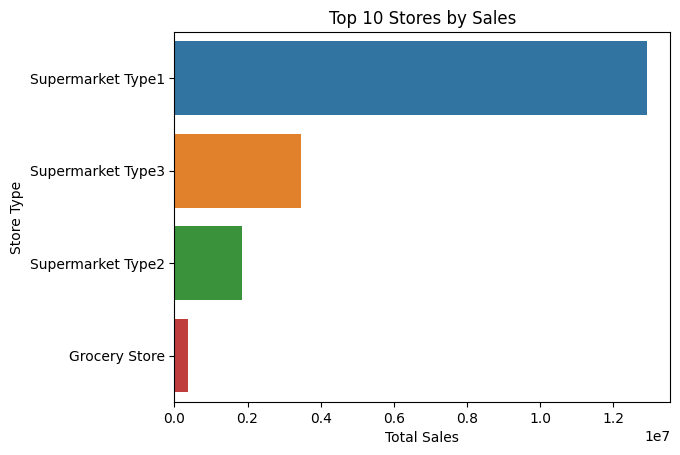

In [61]:
top_stores = sales_data.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)[:10]
print(top_stores)



sns.barplot(x=top_stores.values, y=top_stores.index)
plt.title("Top 10 Stores by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Store Type")
plt.show()

### Top Features

                       Features  Coefficients
1               Item_Visibility   2517.592201
14  Outlet_Location_Type_Tier 2   1084.745801
10           Outlet_Size_Medium   1019.878513
12          Outlet_Size_Unknown    843.111798
13  Outlet_Location_Type_Tier 1    562.198749
15  Outlet_Location_Type_Tier 3    522.547052
11            Outlet_Size_Small    390.243726
9              Outlet_Size_High    213.477011
6      Item_Fat_Content_Regular     90.952854
8          Item_Fat_Content_reg     57.804941


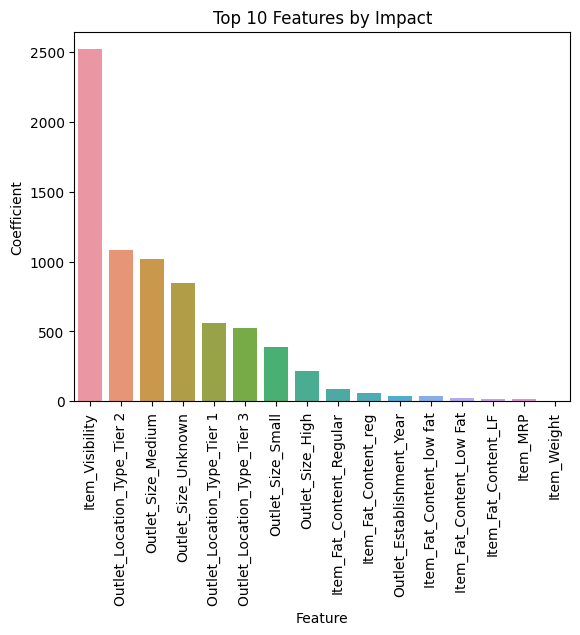

In [76]:

# Identify features with the highest impact on sales
coefficients = pd.DataFrame({'Features': X.columns, 'Coefficients': abs(model.coef_)})
coefficients = coefficients.sort_values('Coefficients', ascending=False)
print(coefficients.head(10))
sns.barplot(x=coefficients['Features'], y=coefficients['Coefficients'])
plt.title("Top 10 Features by Impact")
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.xticks(rotation=90)

plt.show()

### Optimizing Inventory

Top 10 Items with Highest Inventory Turnover Ratio:
Item_Type
Seafood                  16.363936
Starchy Foods            16.093951
Canned                   15.930103
Breads                   15.823497
Fruits and Vegetables    15.691076
Snack Foods              15.598895
Hard Drinks              15.522628
Health and Hygiene       15.495294
Meat                     15.420095
Soft Drinks              15.418828
Name: Inventory_Turnover_Ratio, dtype: float64


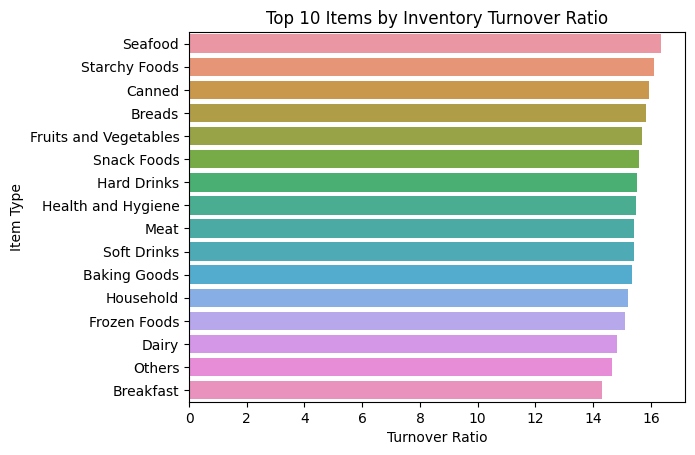

In [62]:
# Optimize inventory management
sales_data["Inventory_Turnover_Ratio"] = sales_data["Item_Outlet_Sales"] / sales_data["Item_MRP"]
inventory_data = sales_data.groupby("Item_Type")["Inventory_Turnover_Ratio"].mean().sort_values(ascending=False)
print("Top 10 Items with Highest Inventory Turnover Ratio:")
print(inventory_data[:10])
sns.barplot(x=inventory_data.values, y=inventory_data.index)
plt.title("Top 10 Items by Inventory Turnover Ratio")
plt.xlabel("Turnover Ratio")
plt.ylabel("Item Type")
plt.show()



Top 4 Outlets with Highest Inventory Turnover Ratio:
Outlet_Type
Supermarket Type3    26.608982
Supermarket Type1    16.339585
Supermarket Type2    13.851706
Grocery Store         2.413176
Name: Inventory_Turnover_Ratio, dtype: float64


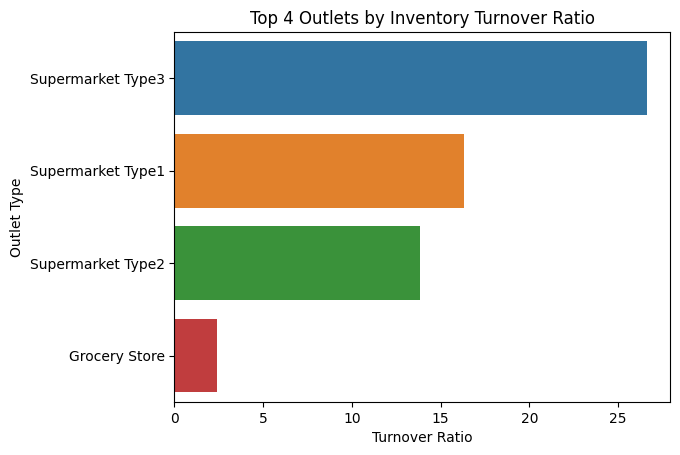

In [63]:
store_inventory_data = sales_data.groupby("Outlet_Type")["Inventory_Turnover_Ratio"].mean().sort_values(ascending=False)
print("Top 4 Outlets with Highest Inventory Turnover Ratio:")
print(store_inventory_data[:4])
sns.barplot(x=store_inventory_data.values, y=store_inventory_data.index)
plt.title("Top 4 Outlets by Inventory Turnover Ratio")
plt.xlabel("Turnover Ratio")
plt.ylabel("Outlet Type")
plt.show()